# Seaborn workbook

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

sns.set_theme('talk','darkgrid',palette='muted',font='serif')

In [3]:
sns.__version__

'0.12.0'

## Data

We will use the same mortgage data we practiced with in the pandas tutorials.

In [2]:
data = pd.read_csv('../data/loan_data_subset.csv')
data.head()

,action_taken,action_taken_name,agency_code,agency_abbr,agency_name,applicant_ethnicity,applicant_ethnicity_name,applicant_income_000s,applicant_race_1,applicant_race_name_1,...,property_type_name,purchaser_type,purchaser_type_name,hud_median_family_income,loan_amount_000s,number_of_1_to_4_family_units,number_of_owner_occupied_units,minority_population,population,tract_to_msamd_income
0,1,Loan originated,2,FRS,Federal Reserve System,3,"Information not provided by applicant in mail,...",36.0,6,"Information not provided by applicant in mail,...",...,One-to-four family dwelling (other than manufa...,2,Ginnie Mae (GNMA),79600.0,85,671.0,541.0,17.190001,1664.0,78.669998
1,1,Loan originated,5,NCUA,National Credit Union Administration,2,Not Hispanic or Latino,10.0,5,White,...,One-to-four family dwelling (other than manufa...,0,Loan was not originated or was not sold in cal...,88300.0,22,1402.0,1305.0,6.630000,3726.0,105.410004
2,4,Application withdrawn by applicant,9,CFPB,Consumer Financial Protection Bureau,1,Hispanic or Latino,28.0,5,White,...,One-to-four family dwelling (other than manufa...,0,Loan was not originated or was not sold in cal...,67000.0,119,1819.0,1542.0,24.240000,6979.0,89.099998
3,3,Application denied by financial institution,7,HUD,Department of Housing and Urban Development,2,Not Hispanic or Latino,21.0,5,White,...,One-to-four family dwelling (other than manufa...,0,Loan was not originated or was not sold in cal...,53700.0,39,1239.0,922.0,24.930000,2896.0,80.000000
4,1,Loan originated,2,FRS,Federal Reserve System,2,Not Hispanic or Latino,87.0,5,White,...,One-to-four family dwelling (other than manufa...,3,Freddie Mac (FHLMC),67000.0,195,2908.0,2537.0,5.540000,8083.0,123.519997


## How many type of loans are there in this dataset? which one is most requested? 

(barchart)

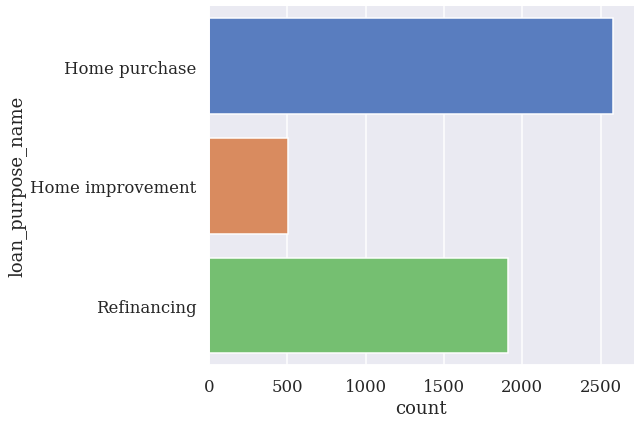

In [3]:
sns.catplot(data,y='loan_purpose_name',kind='count',height=6,aspect=1.5)

### Applying sorting to the bar chart

You can use pandas' inherent functions to pass an `order` to seaborn

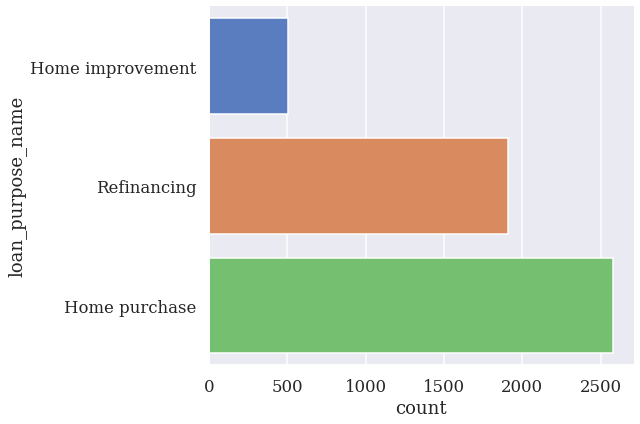

In [7]:
sns.catplot(data,y='loan_purpose_name',kind='count',height=6,aspect=1.5,
            order=data['loan_purpose_name'].value_counts().sort_values().index)

### Renaming axis labels

The y-axis label can be put more elegantly. You can do this in one of two ways:

#### Using the matplotlib `axes` level interface available beneath the Seaborn figure object:

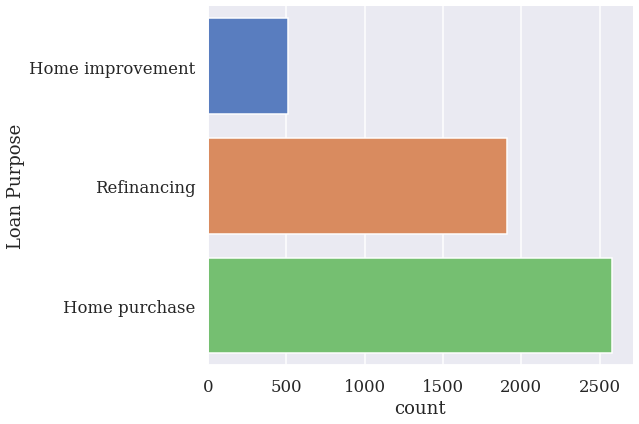

In [8]:
g = sns.catplot(data,y='loan_purpose_name',kind='count',height=6,aspect=1.5,
                order=data['loan_purpose_name'].value_counts().sort_values().index)

g.set(ylabel='Loan Purpose')
# Above command is equivalent of:
#g.ax.set_ylabel('Loan Purpose')

#### Editing the dataframe column directly:

In [9]:
data.rename(columns={'loan_purpose_name':'Loan Purpose'}, inplace=True)

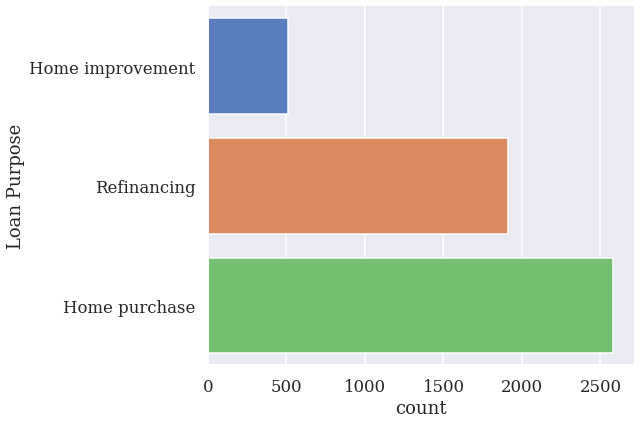

In [10]:
sns.catplot(data,y='Loan Purpose',kind='count',height=6,aspect=1.5,
            order= data['Loan Purpose'].value_counts().sort_values().index)

## There are multiple loan agencies (`agency_abbr`). Is any of them particularly getting more requests from low/high income applicants? or for a specific type of loan?

Let's first make a bar chart of agency and median income of applicants:

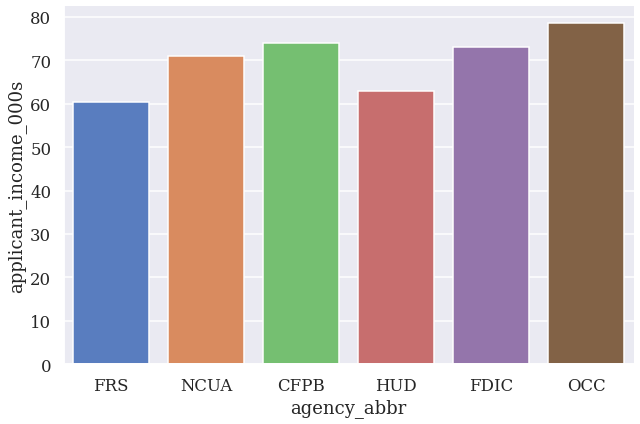

In [13]:
sns.catplot(data=data, x="agency_abbr", y='applicant_income_000s', estimator='median',
            errorbar=('ci', 0.0),kind='bar',height=6,aspect=1.5)

Again, for sorting we rely on pandas' internal functions:

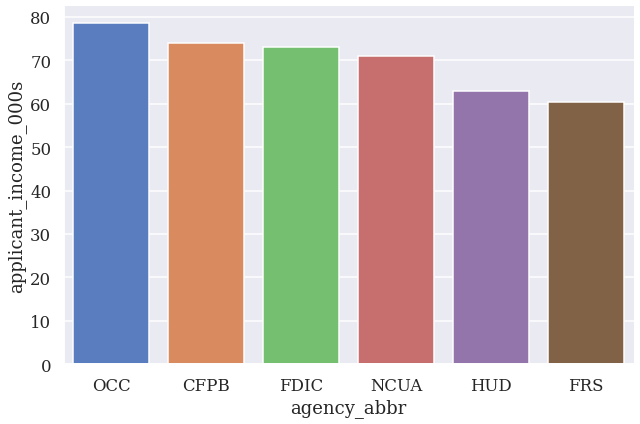

In [9]:
sns.catplot(data=data, x="agency_abbr", y='applicant_income_000s', estimator='median',
            errorbar=('ci', 0),kind='bar',height=6,aspect=1.5,
            order=data.groupby('agency_abbr')['applicant_income_000s'].agg(np.median).sort_values(ascending=False).index)

#### Now let's make a bar chart categorizing with both agency and loan type

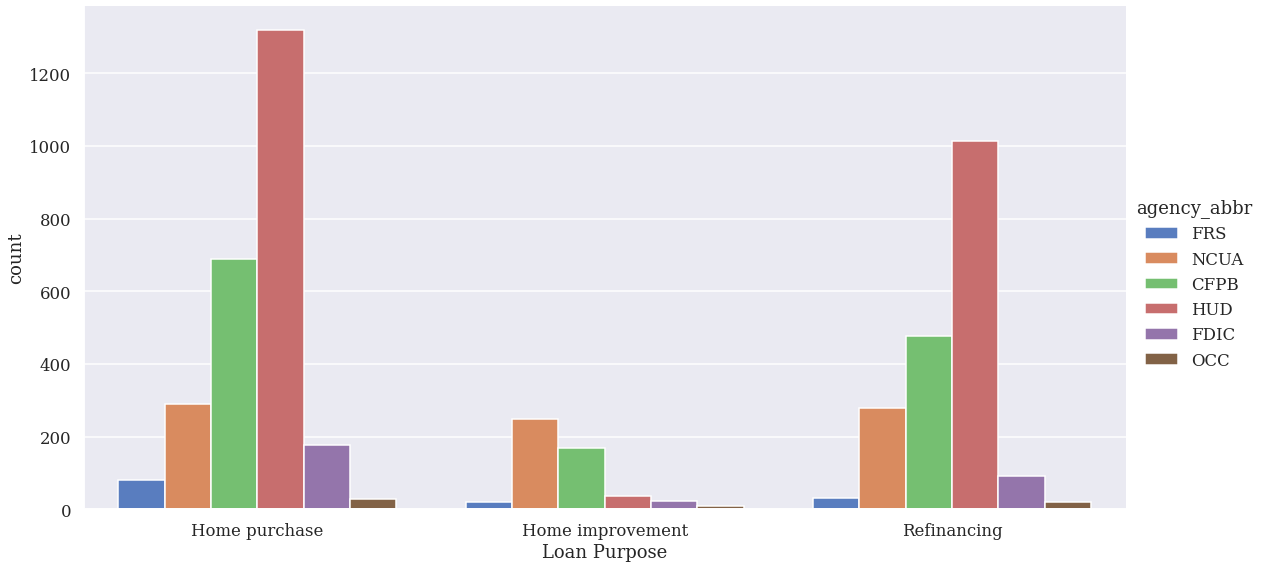

In [14]:
sns.catplot(data=data, x="Loan Purpose", hue="agency_abbr",kind="count",height=8,aspect=2)

## distribution of loan amount as a boxplot function, categorized by agency and loan type

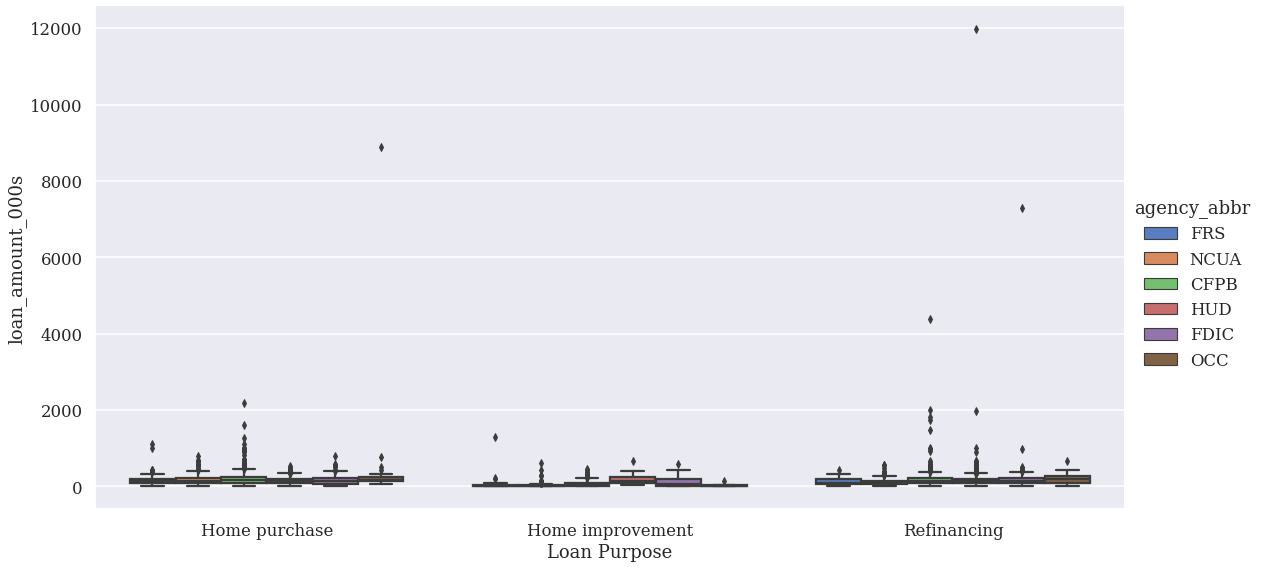

In [15]:
g = sns.catplot(data=data, x="Loan Purpose", y="loan_amount_000s", 
                hue="agency_abbr", kind="box",height=8,aspect=2)

The outliers are strong with this one!

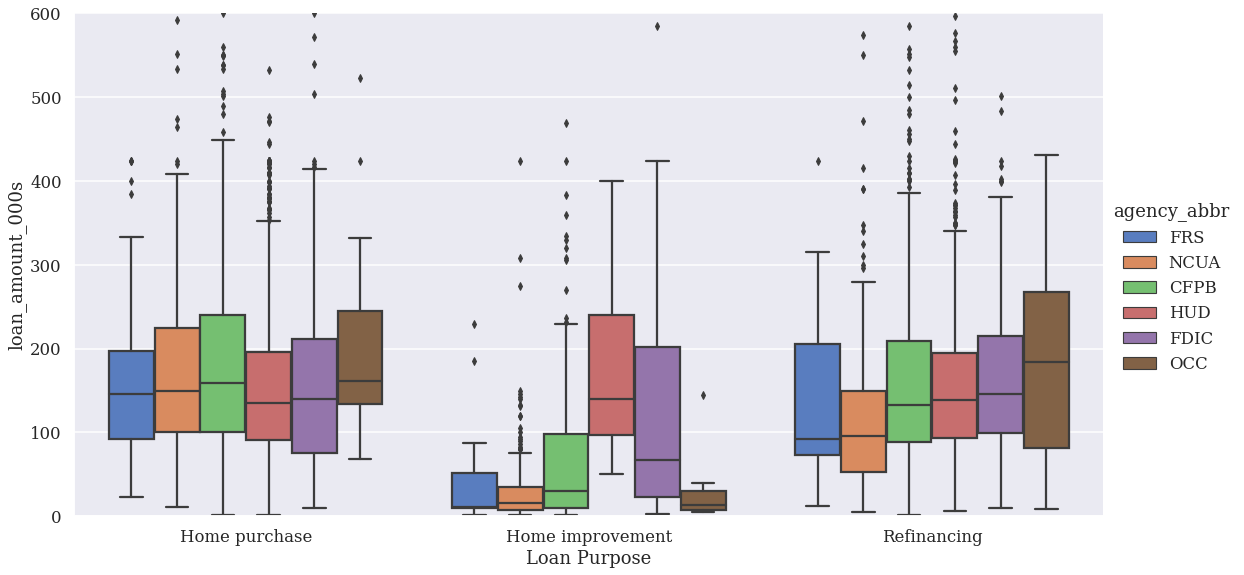

In [16]:
g = sns.catplot(data=data, x="Loan Purpose", y="loan_amount_000s", hue="agency_abbr", kind="box",height=8,aspect=2)
g.set(ylim=(0, 600))

## How are the loan amounts distributed per type of loan?

Let's first look at median

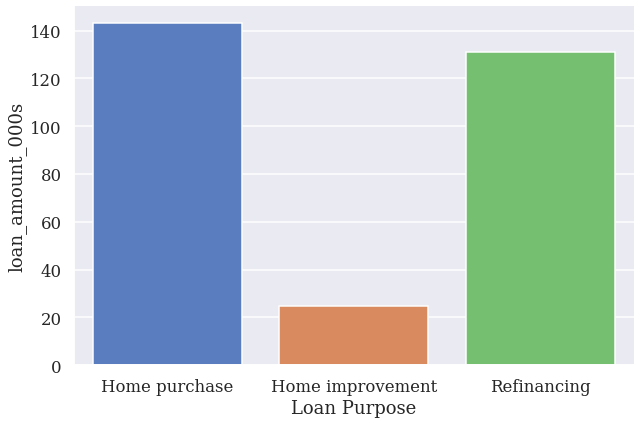

In [17]:
sns.catplot(data,x='Loan Purpose',y='loan_amount_000s',
            kind='bar',estimator='median',height=6,aspect=1.5,errorbar=('ci', 0))

How are they distributed?

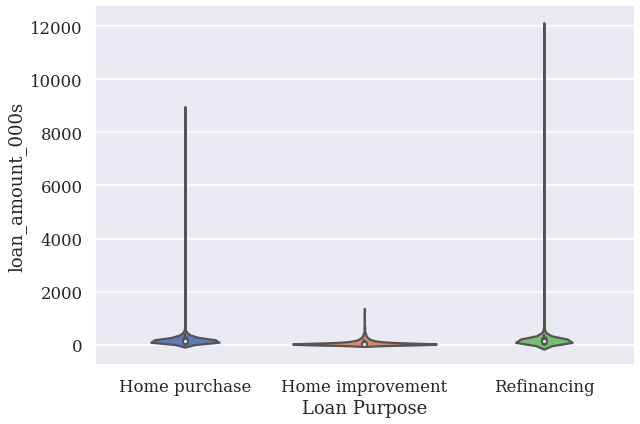

In [18]:
sns.catplot(data,x='Loan Purpose',y='loan_amount_000s',
            kind='violin',bw='silverman',height=6,aspect=1.5,errorbar=('ci', 0))

Let's do this in log-scale based on log of the data

In [20]:
data['log_loan_amount_000s'] = np.log10(data['loan_amount_000s'])

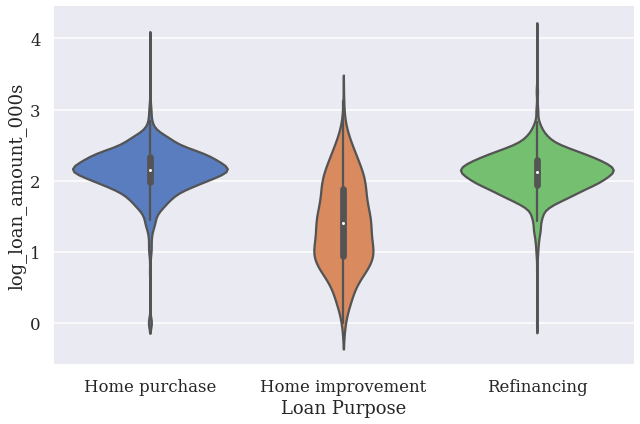

In [21]:
sns.catplot(data,x='Loan Purpose',y='log_loan_amount_000s',kind='violin',bw='silverman',height=6,aspect=1.5,errorbar=('ci', 0))

### let's visualize that with a swarm plot
*a.k.a. remember `geom_jitter` in `ggplot`? (lecture 2 by Suman)*

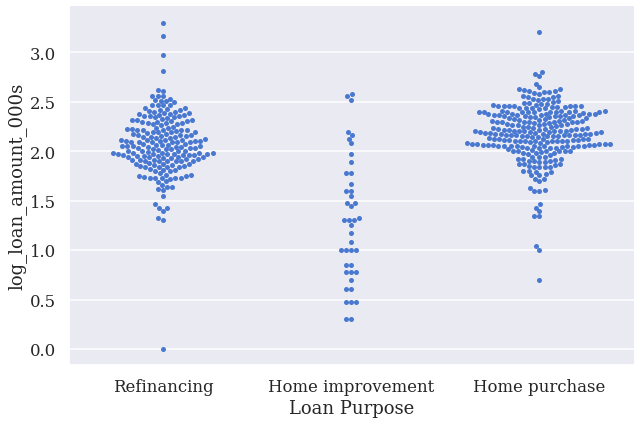

In [23]:
sns.catplot(data.sample(500),x='Loan Purpose',y='log_loan_amount_000s',
            kind='swarm',height=6,aspect=1.5,errorbar=('ci', 0))

### Histogram

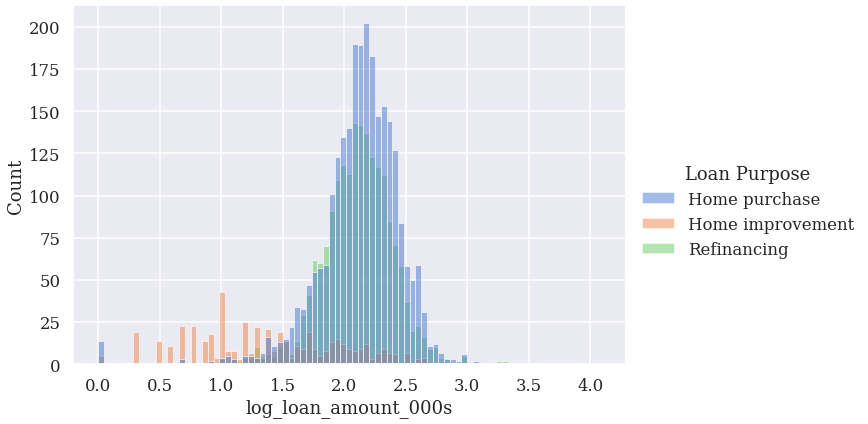

In [24]:
sns.displot(data,x='log_loan_amount_000s',hue='Loan Purpose',height=6,aspect=1.5)

### Stacked histogram

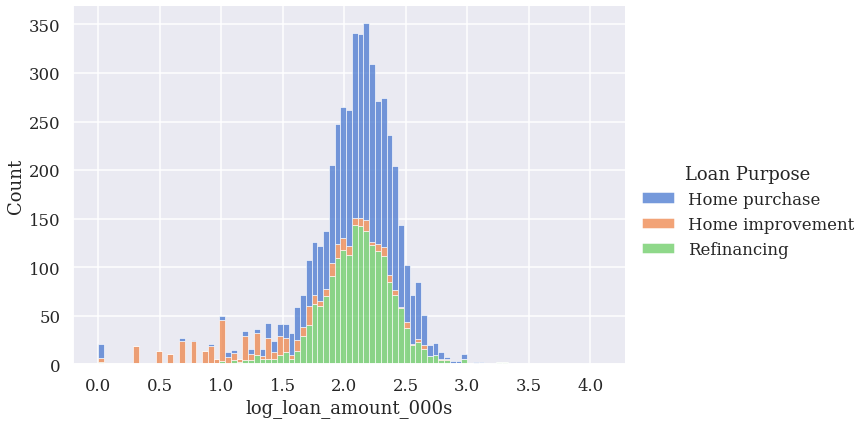

In [19]:
sns.displot(data,x='log_loan_amount_000s',hue='Loan Purpose',height=6,aspect=1.5,multiple='stack')

## ECDF

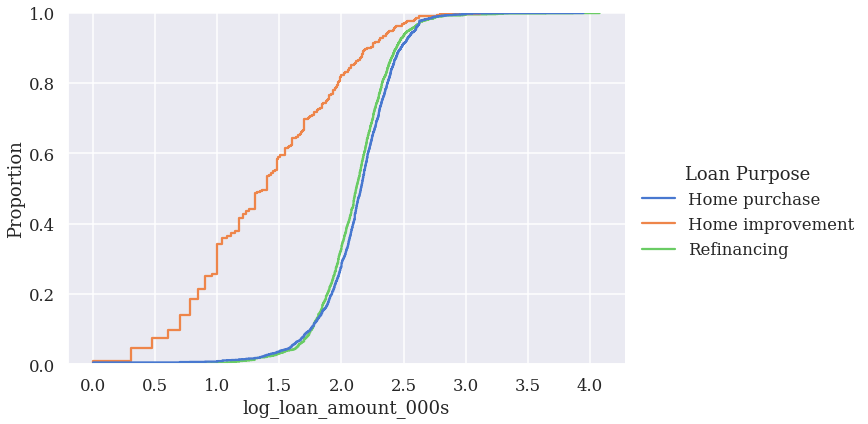

In [25]:
sns.displot(data,x='log_loan_amount_000s',hue='Loan Purpose',height=6,aspect=1.5, kind='ecdf')

### KDE

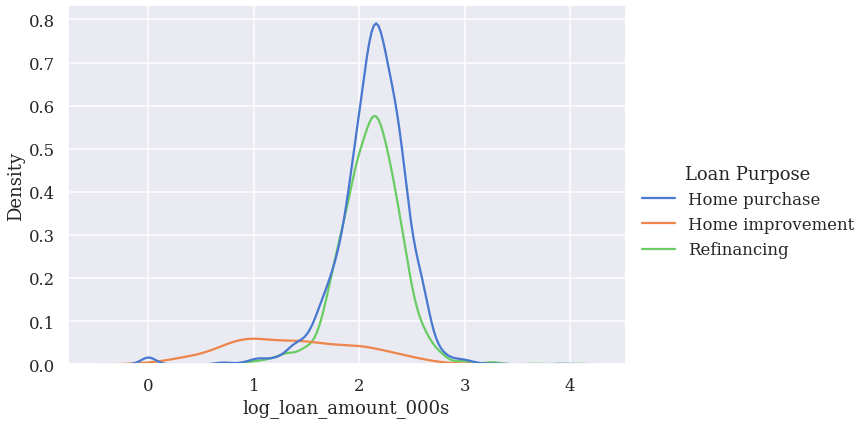

In [26]:
g = sns.displot(data,x='log_loan_amount_000s',hue='Loan Purpose',height=6,aspect=1.5,kind='kde')

`fill` parameter is automatically set based on data, but you can force it:

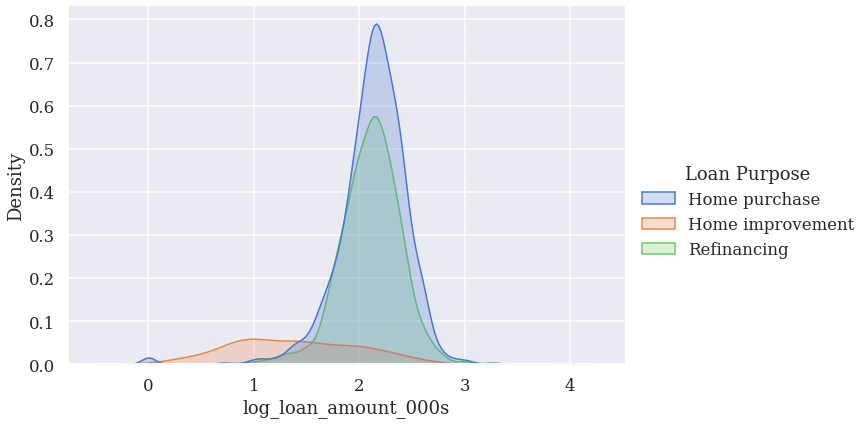

In [27]:
sns.displot(data,x='log_loan_amount_000s',hue='Loan Purpose',height=6,aspect=1.5,kind='kde',fill=True)

## Is there any (visual) correlation between loan amount and income?

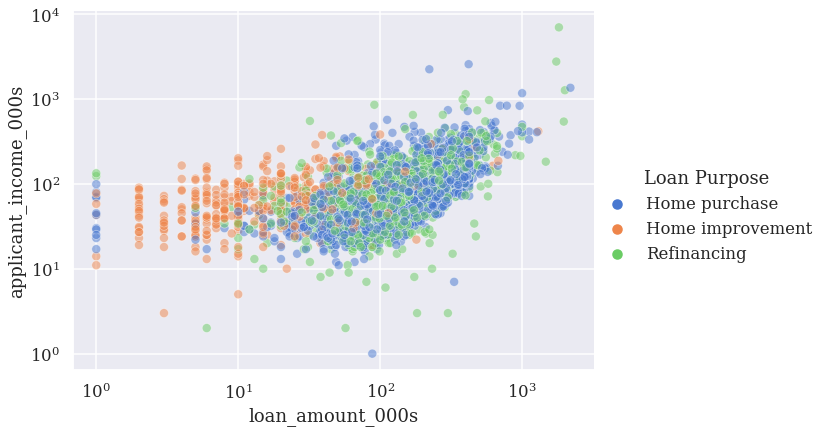

In [28]:
g = sns.relplot(data,x='loan_amount_000s',y='applicant_income_000s',hue='Loan Purpose',height=6,aspect=1.5,alpha=0.5)
g.set(xscale='log',yscale='log')

We can also make use of `jointplot`:

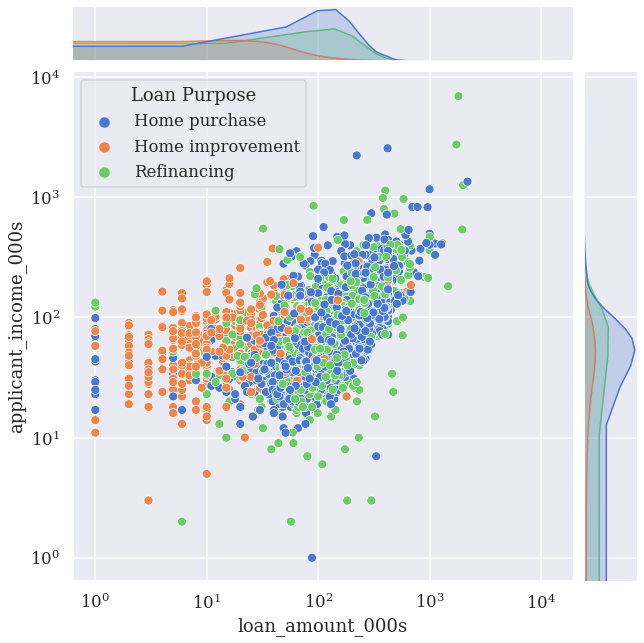

In [29]:
g = sns.jointplot(data,x='loan_amount_000s',y='applicant_income_000s',hue='Loan Purpose',height=9,ratio=8)
g.ax_joint.set_xscale('log')
g.ax_joint.set_yscale('log')